In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

In [2]:
loss = pd.read_csv('checkpoints/vae_12_19_2/loss.csv', delimiter=',')

In [5]:
loss[loss['epoch']==0].mean()

epoch                0.000000
iters             4195.000000
mse               -329.252485
kl                  26.493485
cycle             5092.853265
total             -302.759001
iter_time            6.046806
iter_data_time       0.095760
dtype: float64

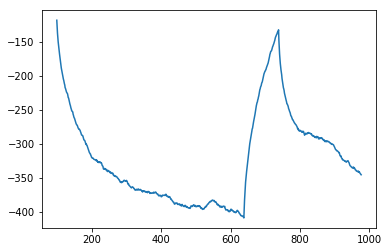

In [142]:
loss['total'].tail(5000).rolling(window=100).mean().plot()

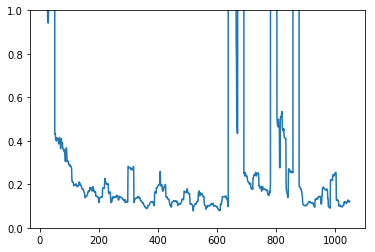

In [10]:
loss['cycle'].tail(5000).rolling(window=20).mean().plot(ylim=[0,1])

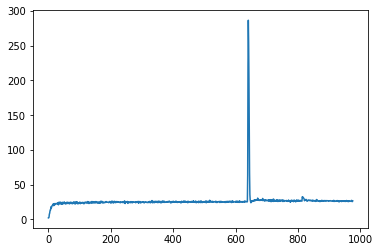

In [144]:
loss['kl'].plot()

In [33]:
loss_no_dropout = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/vae_12_23_no_dropout/vae_12_23_no_dropout/eval.csv', delimiter=',')
loss_dropout = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/vae_12_23/vae_12_23/eval.csv', delimiter=',')
loss_01_02_no_dropout = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_02_no_dropout/01_02_no_dropout/eval.csv', delimiter=',')


In [12]:
def plot_loss(file, key, label):
    plt.plot(file[key].rolling(window=10).mean(),label=label)

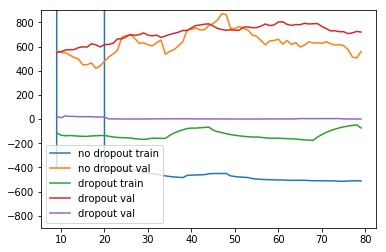

In [15]:
plot_loss(file=loss_no_dropout, key='train_loss',label='no dropout train')
plot_loss(file=loss_no_dropout, key='val_loss',label='no dropout val')
plot_loss(file=loss_dropout, key='train_loss',label='dropout train')
plot_loss(file=loss_dropout, key='val_loss',label='dropout val')
plot_loss(file=loss_dropout, key='val_cycle_loss',label='dropout val')
plt.ylim([-900,900])
plt.legend()

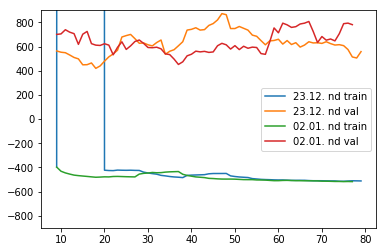

In [36]:
plot_loss(file=loss_no_dropout, key='train_loss',label='23.12. nd train')
plot_loss(file=loss_no_dropout, key='val_loss',label='23.12. nd val')
plot_loss(file=loss_01_02_no_dropout, key='train_loss',label='02.01. nd train')
plot_loss(file=loss_01_02_no_dropout, key='val_loss',label='02.01. nd val')
plt.ylim([-900,900])
plt.legend()

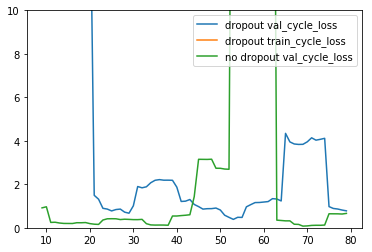

In [30]:
plot_loss(file=loss_dropout, key='val_cycle_loss',label='dropout val_cycle_loss')
plot_loss(file=loss_dropout, key='train_cycle_loss',label='dropout train_cycle_loss')
plot_loss(file=loss_no_dropout, key='val_cycle_loss',label='no dropout val_cycle_loss')
plt.ylim([0,10])
plt.legend()